## The logistic map: a simple population model

In [1]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed
from matplotlib import pyplot as plt
import numpy as np

source: https://flothesof.github.io/examples-chaos-theory.html

In [2]:
def logistic_iter(x, r):
    "One iteration of the logistic map."
    return r * x - r * x**2

The above expression is made of two parts: rx is analogous to a growth term as a function of previous population while −rx2 can be described as a death rate when the population gets high. Critically, both are multiplied by r, which is a parameter of this model.

Let's build some understanding of this simple system by iterating it for 50 times, with a given start population between 0 and 1.

In [3]:
@interact
def plot_logistic_iterated(x0=(0.1, 1, 0.01), r=(0, 4, 0.01)):
    "Plots 50 iterations of a population, given the r parameter."
    vals = [x0]
    for _ in range(50):
        vals.append(logistic_iter(vals[-1], r))
    plt.plot(vals)

interactive(children=(FloatSlider(value=0.55, description='x0', max=1.0, min=0.1, step=0.01), FloatSlider(valu…

Interestingly, different things can happen. For low r values, the population will just decrease:

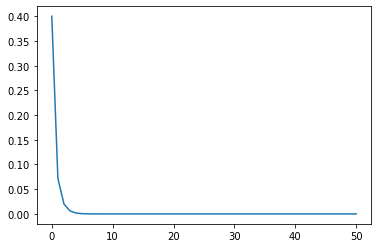

In [4]:
plot_logistic_iterated(x0=0.4, r=0.3)

For intermediate values, below 4, the population will reach equilibrium.

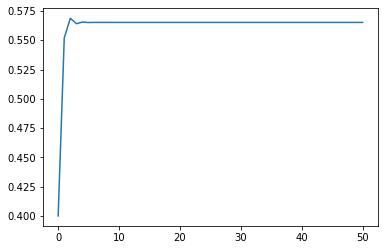

In [5]:
plot_logistic_iterated(x0=0.4, r=2.3)

And then for values closer but below 4, strange things happen:

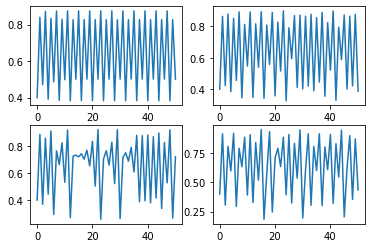

In [6]:
plt.subplot(2, 2, 1)
plot_logistic_iterated(x0=0.4, r=3.5)
plt.subplot(2, 2, 2)
plot_logistic_iterated(x0=0.4, r=3.6)
plt.subplot(2, 2, 3)
plot_logistic_iterated(x0=0.4, r=3.7)
plt.subplot(2, 2, 4)
plot_logistic_iterated(x0=0.4, r=3.8)

We can visualize this in another way, by showing the iterated values on a two dimensional graph:

In [7]:
@interact
def plot_logistic_iterated_2D(x0=(0.1, 1, 0.01), r=(0.01, 4, 0.01), ax=fixed(None)):
    "Plots logistic map for 50 iterations on 2D plot."
    # computes iterated values
    vals = [x0]
    for _ in range(50):
        vals.append(logistic_iter(vals[-1], r))
    # plottingf
    if ax is None:
        fig, ax = plt.subplots()

    for x_start, x_end in zip(vals[:-1], vals[1:]):
        ax.plot([x_start, x_start, x_end], [x_start, x_end, x_end], '-ko')
    xx = np.linspace(0, 1)
    ax.plot(xx, logistic_iter(xx, r))
    ax.plot(xx, xx)

interactive(children=(FloatSlider(value=0.55, description='x0', max=1.0, min=0.1, step=0.01), FloatSlider(valu…

We can display what we observed before in this visualization:

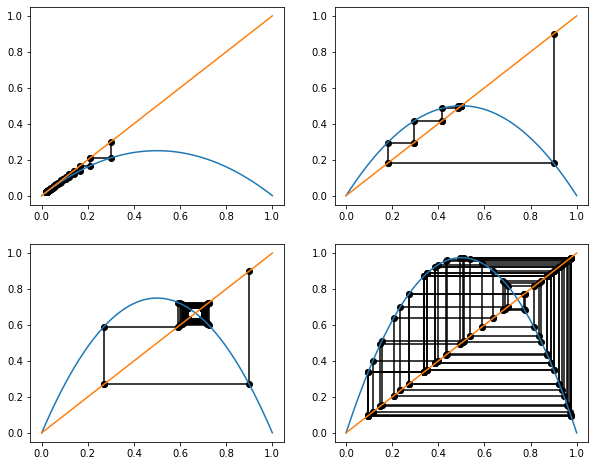

In [8]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(2, 2, 1)
plot_logistic_iterated_2D(0.3, 1, ax=ax) # decrease to 0
ax = plt.subplot(2, 2, 2)
plot_logistic_iterated_2D(0.9, 2, ax=ax) # stable
ax = plt.subplot(2, 2, 3)
plot_logistic_iterated_2D(0.9, 3, ax=ax) # 2 cycle
ax = plt.subplot(2, 2, 4)
plot_logistic_iterated_2D(0.9, 3.9, ax=ax) # ? cycles

Finally, let's make an animation of this.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

x = np.linspace(-2, 2, 200)

duration = 10

fig, ax = plt.subplots(dpi=100)
def make_frame(t):
    r = t / duration * 3.99
    ax.clear()
    plot_logistic_iterated_2D(0.3, r, ax=ax)
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
plt.close(fig)
animation.ipython_display(fps=25, loop=True, autoplay=True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


Another way to plot this is to evaluate the final population after a fixed number of iterations over the two-dimensional grid in the (r,x0) space.

In [10]:
r = np.linspace(0, 4, num=400)
x0 = np.linspace(0, 1, num=400)
vals = np.empty((r.size, x0.size))
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        def final_value(x, r, iters=50):
            for _ in range(iters):
                x = logistic_iter(x, r)
            return x
        vals[i, j] = final_value(x0[j], r[i])

If we plot this with a marker at the final value of the population, we find a map with bifurcations, regions where it decreases to 0, where it reaches an equilibrium as a function of r, where it can have two values, more and more and then chaos.

Text(0.5, 0, 'value of $r$ parameter')

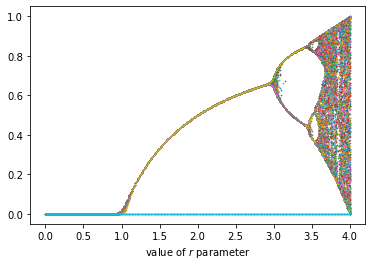

In [11]:
plt.plot([rr * np.ones(vals.shape[0]) for rr in r], [row for row in vals], 'x', ms=0.9)
plt.xlabel('value of $r$ parameter')

Finally, we can also plot this as an image over the 2D sampled space.

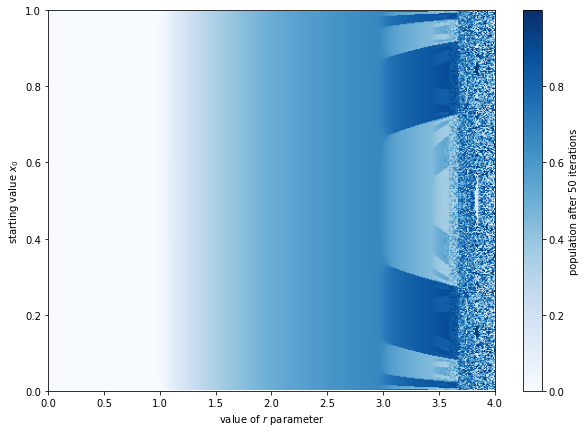

In [13]:
plt.figure(figsize=(10, 7))
plt.imshow(vals.T, extent=(r.min(), r.max(), x0.min(), x0.max()), origin='upper', 
           aspect='auto', cmap='Blues')
plt.xlabel('value of $r$ parameter')
plt.ylabel('starting value $x_0$')
plt.colorbar(label='population after 50 iterations')